Nama : Dimas Tri Atmojo

NIM : 5312422033

Prodi : Teknik Komputer

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import lfilter, freqz, butter, firls, remez, firwin, firwin2, group_delay
from scipy.fftpack import fft, fftshift

**Penyaring Butterworth**

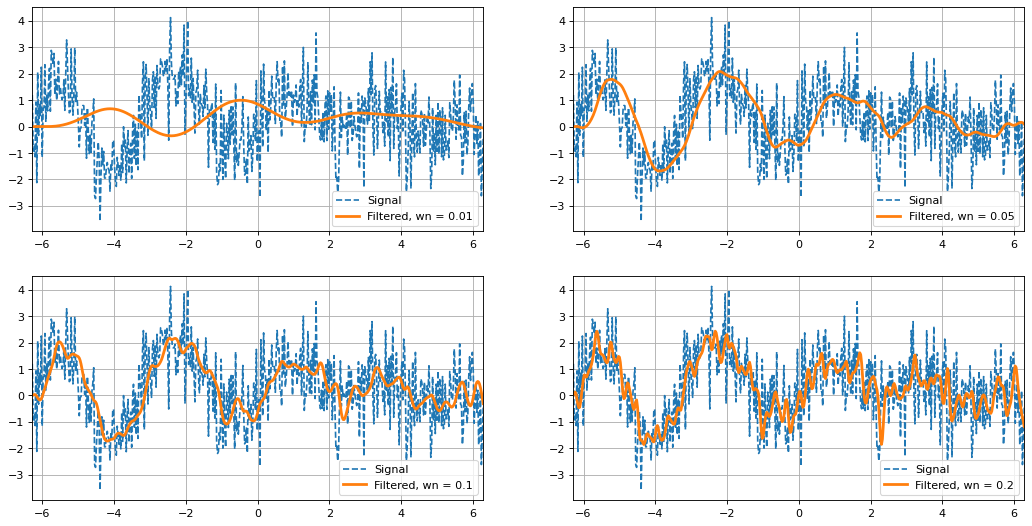

In [ ]:
# Import library yang dibutuhkan
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, lfilter

# Membuat sinyal input
t = 2 * np.pi * np.linspace(-1, 1, 500)  # Membuat vektor waktu dari -2π sampai 2π dengan 500 titik
x = np.sin(0.25 * t * t) + 0.95 * np.sin(2.0 * t)  # Menggabungkan dua sinyal sinusoidal dengan frekuensi berbeda

# Menambahkan noise putih ke sinyal
np.random.seed(1)  # Mengatur seed untuk menghasilkan noise yang sama setiap kali dijalankan
xn = x + np.random.randn(len(t))  # Menambahkan noise Gaussian (putih) ke sinyal

# Membuat filter lowpass Butterworth orde-3
b, a = butter(3, 0.2)  # Membuat koefisien filter Butterworth orde-3 dengan frekuensi cutoff 0.2
z = lfilter(b, a, xn)  # Menerapkan filter pada sinyal yang bising

# Daftar frekuensi cutoff untuk filter IIR
wn = [0.01, 0.05, 0.1, 0.2]  # Frekuensi cutoff yang berbeda

# Menghitung filter IIR untuk berbagai frekuensi cutoff
zz = np.zeros((t.size, 4))  # Membuat matriks untuk menyimpan hasil filter
for i in range(4):
    b, a = butter(3, wn[i])  # Membuat koefisien filter Butterworth orde-3 untuk setiap frekuensi cutoff
    zz[:, i] = lfilter(b, a, xn)  # Menerapkan filter pada sinyal yang bising dan menyimpan hasilnya

# Plot hasilnya
plt.figure(figsize=(16, 8), dpi=80)  # Mengatur ukuran dan resolusi gambar
for i in range(4):
    plt.subplot(2, 2, i+1)  # Membuat subplot 2x2
    plt.plot(t, xn, 'C0--', linewidth=1.5)  # Plot sinyal asli yang bising dengan garis putus-putus biru
    plt.plot(t, zz[:, i], 'C1', linewidth=2.5)  # Plot sinyal yang sudah difilter dengan garis tebal oranye
    plt.xlim([-2 * np.pi, 2 * np.pi])  # Mengatur batas sumbu-x
    plt.grid(True)  # Menampilkan grid
    plt.legend(('Signal', 'Filtered, wn = {}'.format(wn[i])), loc='lower right')  # Menambahkan legenda dengan frekuensi cutoff

plt.show()  # Menampilkan plot


Grafik pertama menampilkan sinyal dan hasil filter dengan wn = 0.05. Sinyalnya berbentuk sinusoidal dengan frekuensi yang relatif rendah. Hasil filternya hampir identik dengan sinyal aslinya, menunjukkan bahwa filter dengan wn = 0.05 tidak banyak mengubah sinyal.

Grafik kedua menampilkan sinyal dan hasil filter dengan wn = 0.01. Sinyalnya masih berbentuk sinusoidal, tetapi dengan frekuensi yang lebih rendah dibandingkan dengan grafik pertama. Hasil filternya menunjukkan sedikit distorsi, menunjukkan bahwa filter dengan wn = 0.01 mulai sedikit mengubah sinyal.

Grafik ketiga menampilkan sinyal dan hasil filter dengan wn = 0.2. Sinyalnya masih berbentuk sinusoidal, tetapi dengan frekuensi yang lebih tinggi dibandingkan dengan grafik kedua. Hasil filternya menunjukkan distorsi yang lebih besar dibandingkan dengan grafik kedua, menunjukkan bahwa filter dengan wn = 0.2 mulai banyak mengubah sinyal.

Grafik keempat menampilkan sinyal dan hasil filter dengan wn = 0.1. Sinyalnya masih berbentuk sinusoidal, tetapi dengan frekuensi yang lebih tinggi dibandingkan dengan grafik ketiga. Hasil filternya menunjukkan distorsi yang sangat besar, menunjukkan bahwa filter dengan wn = 0.1 banyak mengubah sinyal.